In [583]:
#Importing all the required libraries
import pandas as pd #It makes working with structured data (like CSV files or database tables) easier. You can filter, transform, and analyze data easily using pandas.
import numpy as np #mathematical library #It helps with working on large sets of numbers efficiently, performing mathematical operations, and handling multi-dimensional arrays (like tables of numbers). 
import sklearn # It provides machine learning tools and algorithms for tasks like classification, regression, clustering, and more. It helps you build and train machine learning models.
import matplotlib.pyplot as plt #It helps create visualizations such as line plots, scatter plots, and histograms. You can use it to represent your data visually.
import seaborn as sns #It builds on top of matplotlib and makes it simpler to create statistical visualizations with better aesthetics. It's useful for creating attractive plots like heatmaps, violin plots, and more.
import warnings as wr #Ignores the warnings
wr.filterwarnings('ignore') 

In [584]:
df=pd.read_csv("heart failure.csv")

In [585]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [586]:
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [587]:
df.shape

(299, 13)

In [588]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [589]:
df.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

<Axes: xlabel='DEATH_EVENT', ylabel='count'>

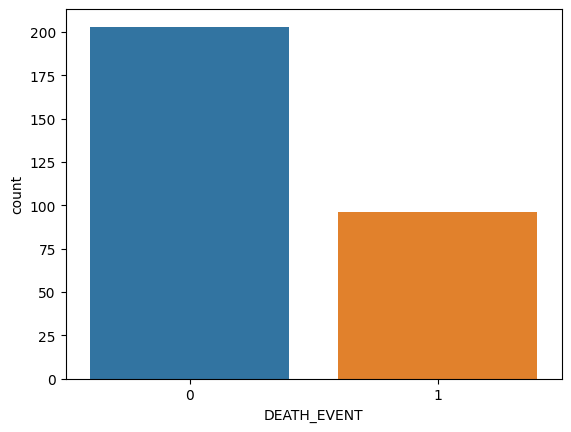

In [590]:
sns.countplot(x="DEATH_EVENT", data=df) #non-death event-0 and death event-1.

<Axes: xlabel='high_blood_pressure', ylabel='count'>

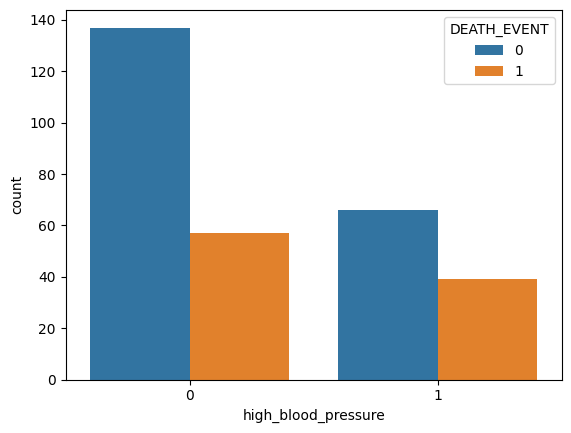

In [591]:
sns.countplot(x="high_blood_pressure", data=df, hue="DEATH_EVENT")  # from the dead people, how many of them died from high bp (1) and people who are not dead, don't also have high bp (0).

<Axes: xlabel='diabetes', ylabel='count'>

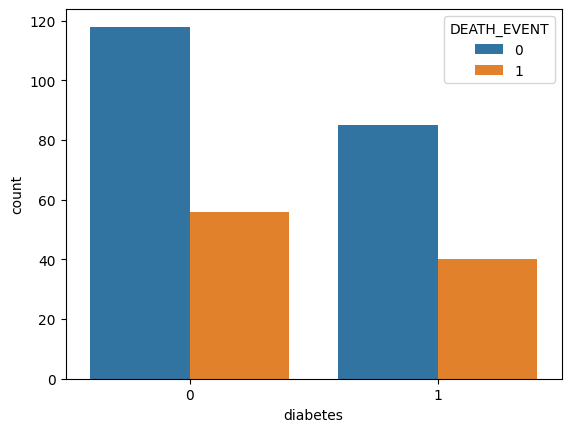

In [592]:
sns.countplot(x="diabetes", data=df, hue="DEATH_EVENT") # how many diabetes patients are there in respect of death_Event column?

<Axes: xlabel='anaemia', ylabel='count'>

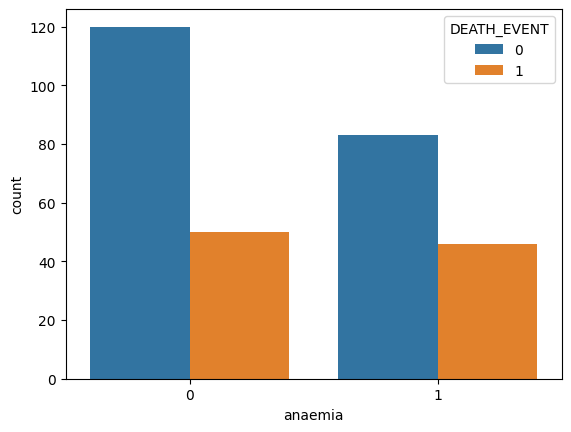

In [593]:
sns.countplot(x="anaemia", data=df, hue="DEATH_EVENT")

<Axes: xlabel='sex', ylabel='count'>

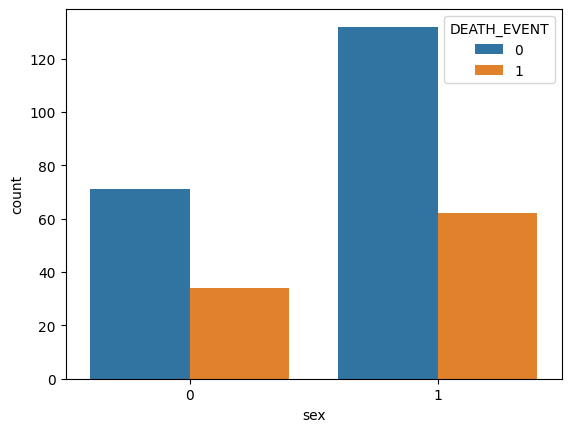

In [594]:
sns.countplot(x="sex", data=df, hue="DEATH_EVENT")

 **Train Test Separation**

In [595]:
from sklearn.model_selection import train_test_split

In [596]:
xtrain, xtest, ytrain, ytest = train_test_split(df.drop('DEATH_EVENT', axis=1), df[['DEATH_EVENT']], random_state=1,train_size=.70)

#df: It is assumed to be a pandas DataFrame containing the dataset.
#df.drop('DEATH_EVENT', axis=1): This part drops the column labeled 'DEATH_EVENT' from the DataFrame, creating a new DataFrame that consists of the input features for the model.
#df[['DEATH_EVENT']]: This part selects only the column labeled 'DEATH_EVENT' from the DataFrame, creating a new DataFrame that consists of the target variable.
#random_state=1: It sets the random state to a fixed value of 1, ensuring reproducibility. The random state determines the random permutation of the data during the splitting process.
#train_size=.70: This specifies the proportion of the dataset that should be allocated for the training set. Here, 70% of the data will be used for training, and the remaining 30% will be used for testing.

#xtrain: It contains the input features for the training set.
#xtest: It contains the input features for the testing set.
#ytrain: It contains the target variable (DEATH_EVENT) for the training set.
#ytest: It contains the target variable (DEATH_EVENT) for the testing set.

In [597]:
xtrain.shape

(209, 12)

In [598]:
xtrain.head(3)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
14,49.0,1,80,0,30,1,427000.0,1.0,138,0,0,12
210,70.0,0,212,1,17,1,389000.0,1.0,136,1,1,188
236,75.0,0,119,0,50,1,248000.0,1.1,148,1,0,209


In [599]:
xtest.shape

(90, 12)

In [600]:
ytrain.shape

(209, 1)

In [601]:
ytest.shape

(90, 1)

In [602]:
xtest.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
173,50.0,1,115,0,20,0,189000.0,0.8,139,1,0,146
287,45.0,0,582,1,55,0,543000.0,1.0,132,0,0,250
51,53.0,1,91,0,20,1,418000.0,1.4,139,0,0,43
146,52.0,0,132,0,30,0,218000.0,0.7,136,1,1,112
214,65.0,1,135,0,35,1,290000.0,0.8,134,1,0,194


In [603]:
ytrain.head()

,DEATH_EVENT
14,0
210,0
236,0
44,1
163,1


In [604]:
ytest.head()

,DEATH_EVENT
173,0
287,0
51,1
146,0
214,0


In [605]:
from sklearn.tree import DecisionTreeClassifier

In [606]:
dt=DecisionTreeClassifier()

In [607]:
dt.fit(xtrain,ytrain) #training done

DecisionTreeClassifier()

In [608]:
#prediction

pred= dt.predict(xtrain) #training result 
#predicting the target variable (DEATH_EVENT) for the training set (xtrain) using a decision tree classifier (dt).

In [609]:
pred #The predicted values for the target variable are assigned to the variable pred

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1])

In [610]:
ytrain.head()

,DEATH_EVENT
14,0
210,0
236,0
44,1
163,1


In [611]:
ytrain['Pred']=pred #assigns the predicted values (pred) to a new column named 'Pred' in the ytrain DataFrame.

In [612]:
ytrain.head(10)

,DEATH_EVENT,Pred
14,0,0
210,0,0
236,0,0
44,1,1
163,1,1
292,0,0
117,0,0
258,0,0
41,1,1
79,0,0


In [613]:
ytrain.tail(20)

,DEATH_EVENT,Pred
241,0,0
215,0,0
68,1,1
50,1,1
156,0,0
252,0,0
254,0,0
276,0,0
178,0,0
281,0,0


In [614]:
dt.score(xtrain, ytrain['DEATH_EVENT'])
#calculates the accuracy score of the decision tree classifier (dt) on the training set.

1.0

In [615]:
pred2=dt.predict(xtest)
#predicting the target variable (DEATH_EVENT) for the testing set (xtest) using the decision tree classifier (dt).

In [616]:
pred2 #testing result

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1])

In [617]:
dt.score(xtest, ytest)
#calculates the accuracy score of the decision tree classifier (dt) on the testing set.

0.8111111111111111

In [618]:
dt.score(xtest, ytest['DEATH_EVENT']) 

0.8111111111111111

In [619]:
ytest

,DEATH_EVENT
173,0
287,0
51,1
146,0
214,0
...,...
122,0
246,1
278,0
251,0


**Confusion Matrix**

In [620]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [621]:
pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [622]:
from sklearn.metrics import RocCurveDisplay

#from sklearn.metrics import plot_roc_curve

In [623]:
ytest.head()

,DEATH_EVENT
173,0
287,0
51,1
146,0
214,0


In [624]:
xtest.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
173,50.0,1,115,0,20,0,189000.0,0.8,139,1,0,146
287,45.0,0,582,1,55,0,543000.0,1.0,132,0,0,250
51,53.0,1,91,0,20,1,418000.0,1.4,139,0,0,43
146,52.0,0,132,0,30,0,218000.0,0.7,136,1,1,112
214,65.0,1,135,0,35,1,290000.0,0.8,134,1,0,194


In [625]:
dt.predict(xtest) #predicted result

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1])

**Accuracy / Recognition Rate**

In [626]:
accuracy_score(ytest,dt.predict(xtest))

#ytest is the true target variable values for the testing set
#the predicted values from the classifier (dt.predict(xtest)).

0.8111111111111111

In [627]:
(57+16)/(57+16+10+7)

0.8111111111111111

In [628]:
cm=confusion_matrix(ytest,dt.predict(xtest))

In [629]:
cm 

#TP=57, TN=16, FP=7, FN=10

#Whoever has heart disease and predicts this correctly- TP. 
# Doesn't have disease but predicts disease - FP.
# Has disease but predicts no disease - FN.
# Doesn't have disease and predicts no disease - TN.

# y = heart disease prediction.
# ytest -> actual
# dt.predict(xtest) -> predicted


array([[57,  7],
       [10, 16]])

In [630]:
tp = cm[0, 0]
fp = cm[0, 1]
fn = cm[1, 0]
tn = cm[1, 1]

# Print the values
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)
print("False Positives (FP):", fp)
print("False Negatives (FN):", fn)


True Positives (TP): 57
True Negatives (TN): 16
False Positives (FP): 7
False Negatives (FN): 10


**Precision / Positive Predictive Value (PPV)** 

In [631]:
p = precision_score(ytest,dt.predict(xtest))
p

0.6956521739130435

**Recall/ Sensitivity / Hit Rate / True Positive Rate (TPR)**

In [632]:
r = recall_score(ytest,dt.predict(xtest))
r

0.6153846153846154

**F1-Score**

In [633]:
f1_score(ytest,dt.predict(xtest))

0.6530612244897959

**Harmonic Mean / F-Measure**

In [634]:
hm = ( 2 * p * r ) / (p + r)
hm

0.6530612244897959

**Specificity, Selectivity or True Negative Rate (TNR)**

In [635]:
Specificity = tn / (tn+ fp)

**False Positive Rate (FPR) or 1-Specificity**

In [636]:
FPR = fp / (fp + tn)
FPR

0.30434782608695654

In [637]:
FPR = 1-Specificity
FPR

0.30434782608695654

**Threat Score (TS) or Critical Success Index (CSI)**

In [638]:
TS = tp / (tp + fn + fp )
TS

0.7702702702702703

**False Discovery Rate (FDR)**

In [639]:
fdr = fp / (tp + fp )
fdr

0.109375

**ROC & AUC Curve**

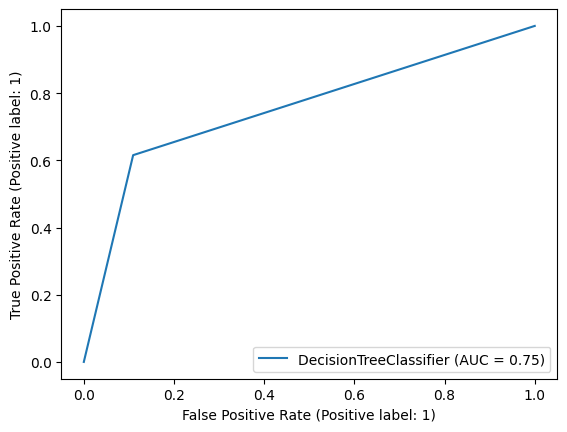

In [640]:
# plot_roc_curve(dt, xtest, ytest)

# Create an instance of RocCurveDisplay
roc_display = RocCurveDisplay.from_estimator(dt, xtest, ytest)

#The from_estimator method of RocCurveDisplay takes the estimator (dt), input data (xtest), and true target variable values (ytest) as arguments.

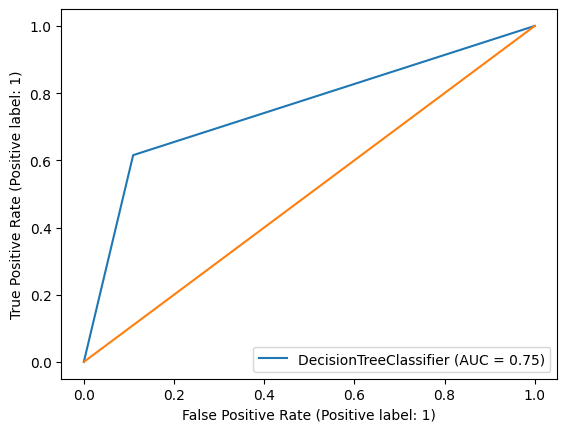

In [641]:
roc_display = RocCurveDisplay.from_estimator(dt, xtest, ytest)
plt.plot([0,1],[0,1]) #Random Decision (Orange Line) (Half of positives are classified Correctly, half of negatives are classified correctly).

**Heatmap**

<Axes: >

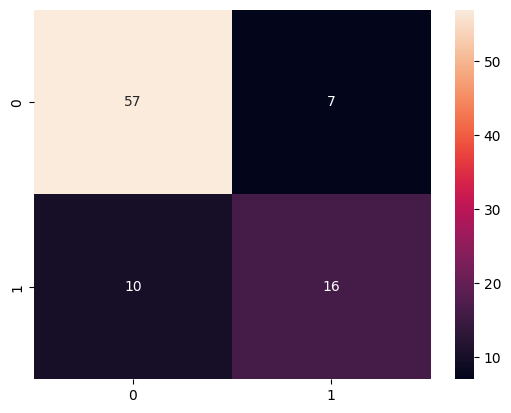

In [642]:
sns.heatmap(cm, annot=True)

#The x-axis represents the predicted labels, and the y-axis represents the actual labels. The color of each cell indicates the magnitude of the values.